In [49]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from scipy.signal import convolve2d
from scipy.optimize import curve_fit

In [82]:
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'lines.linewidth': 2})

def findMoment(arr,order,shift=0):
    # Shift i to i - 50
    shifted_indices = np.arange(len(arr)) - (len(arr)/2) - shift
    
    zero = np.average(arr[0:10])

    # return np.sum(shifted_indices**order * (arr-np.min(arr))) / np.sum(arr-np.min(arr))
    return np.sum(shifted_indices**order * (np.abs(arr-zero)) / np.sum(np.abs(arr-zero)))

## 100*100 Correlation Rnd Diagonal Hopping

### no drive, pgen=0.001*i, nsim=100, 1-10

In [28]:
file_name = "../data/240919/240919_10_"
x_l = np.loadtxt(file_name+'pcoor_scanx.csv',skiprows=1)
y_l = np.loadtxt(file_name+'pcoor_scany.csv',skiprows=1)
t_l = np.loadtxt(file_name+'pcoor_scanz.csv',skiprows=1)
raw = np.loadtxt(file_name+'pcoor_data.csv',skiprows=1,delimiter=',')
pcoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')
raw = np.loadtxt(file_name+'ncoor_data.csv',skiprows=1,delimiter=',')
ncoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')
raw = np.loadtxt(file_name+'scoor_data.csv',skiprows=1,delimiter=',')
scoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')

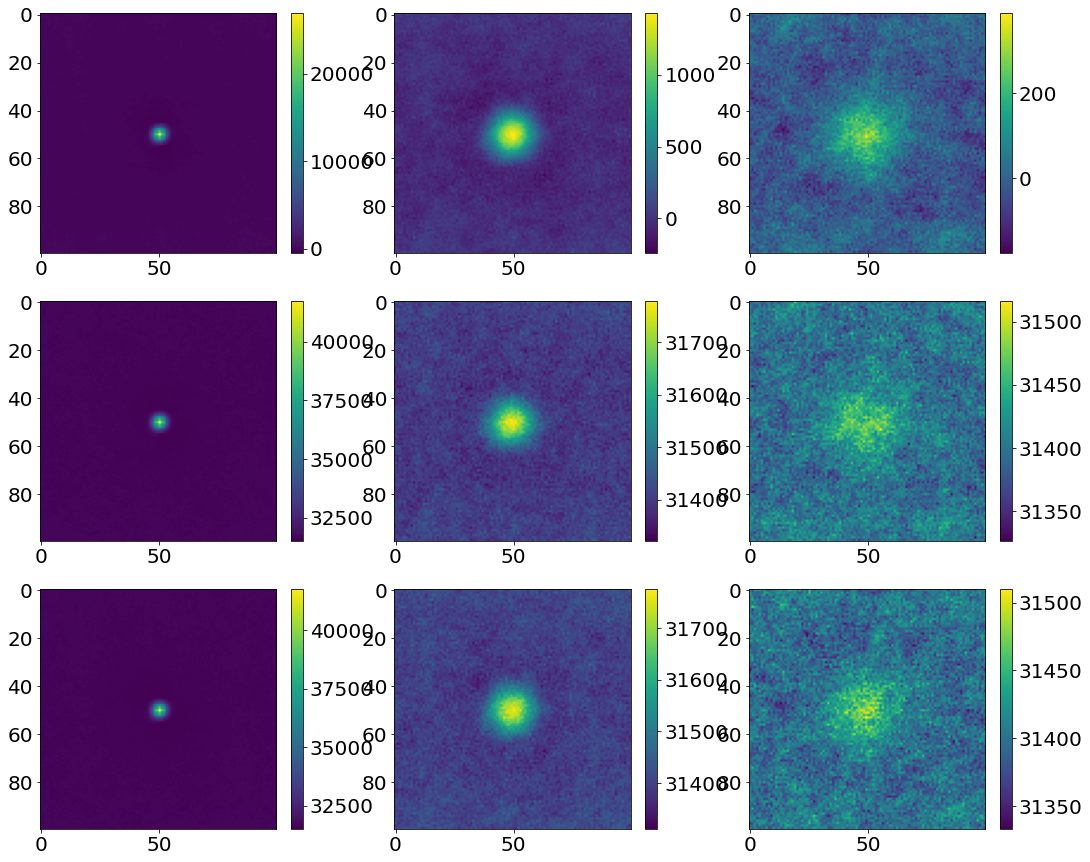

In [29]:
t1 = 4
t2 = 50
t3 = 150

plt.figure(figsize=(18,15))
plt.subplot(3,3,1)
scoor_r = np.roll(scoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(scoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,2)
scoor_r = np.roll(scoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(scoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,3)
scoor_r = np.roll(scoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(scoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,4)
pcoor_r = np.roll(pcoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(pcoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,5)
pcoor_r = np.roll(pcoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(pcoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,6)
pcoor_r = np.roll(pcoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(pcoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,7)
ncoor_r = np.roll(ncoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(ncoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,8)
ncoor_r = np.roll(ncoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(ncoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,9)
ncoor_r = np.roll(ncoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(ncoor_r,aspect='auto')
plt.colorbar()

In [14]:
def gaussian_2d(coor, x0, y0, sigma_x, sigma_y, amplitude, offset):
    """2D Gaussian function."""
    x = coor[0]
    y = coor[1]
    return offset + amplitude * np.exp(
        -(((x - x0) ** 2) / (2 * sigma_x ** 2) + ((y - y0) ** 2) / (2 * sigma_y ** 2))
    )

params_l = []
# for t in range(int(scoor.shape[-1]/2)):
for t in range(200):
    scoor_t = np.roll(scoor[:,:,t],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
    # Get the coordinates of the pixels
    x = np.arange(0, scoor_t.shape[1])
    y = np.arange(0, scoor_t.shape[0])
    x, y = np.meshgrid(x, y)

    # Flatten the arrays for fitting
    x = x.ravel()
    y = y.ravel()
    z = scoor_t.ravel()

    # Initial guess for the parameters
    initial_guess = (scoor_t.shape[1] / 2, scoor_t.shape[0] / 2, 1, 1, np.max(scoor_t), np.min(scoor_t))
    
    # Fit the data
    params, _ = curve_fit(gaussian_2d, (x, y), z, p0=initial_guess)

    # Extract the parameters
    x0, y0, sigma_x, sigma_y, amplitude, offset = params
    params_l.append(params)

params_l = np.array(params_l)
params_l.shape

/usr/local/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


(200, 6)

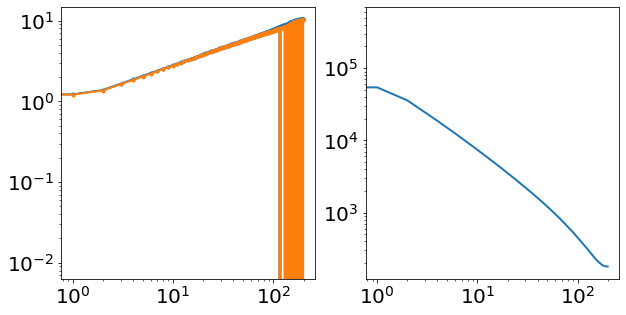

In [15]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot((params_l[:,2]+params_l[:,3])/2,'.-')
plt.plot(params_l[:,3],'.-')
# plt.ylim(1e0,1e1)
plt.xscale('log')
plt.yscale('log')
plt.subplot(1,2,2)
plt.plot(params_l[:,4])
plt.xscale('log')
plt.yscale('log')

In [16]:
slope_start = 10
slope_end = 100

tfit_l = np.arange(slope_start,slope_end,dtype=int)
m, b = np.polyfit(np.log(tfit_l), np.log((params_l[slope_start:slope_end,2]+params_l[slope_start:slope_end,3])/2), 1)
print("var exponents", m)
m, b = np.polyfit(np.log(tfit_l), np.log(params_l[slope_start:slope_end,4]), 1)
print("var exponents", m)

var exponents 0.43324880929004045
var exponents -1.231351315866425


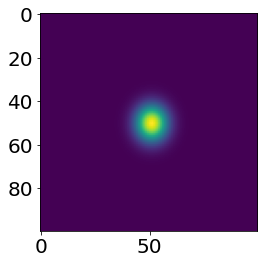

In [42]:
fitted_gaussian = gaussian_2d((x, y), *params).reshape(scoor_t.shape)
plt.imshow(fitted_gaussian)


### Drive
pdr=0.25+0.01*i, pgen=0.001, nsim=100, 11-20

pdr=0.25+0.01*i, pgen=0.01, nsim=100, 21-30

In [46]:
i = 7
file_name = "../data/240919/240919_%d_"%(20+i)
x_l = np.loadtxt(file_name+'pcoor_scanx.csv',skiprows=1)
y_l = np.loadtxt(file_name+'pcoor_scany.csv',skiprows=1)
t_l = np.loadtxt(file_name+'pcoor_scanz.csv',skiprows=1)
raw = np.loadtxt(file_name+'pcoor_data.csv',skiprows=1,delimiter=',')
pcoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')
raw = np.loadtxt(file_name+'ncoor_data.csv',skiprows=1,delimiter=',')
ncoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')
raw = np.loadtxt(file_name+'scoor_data.csv',skiprows=1,delimiter=',')
scoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')

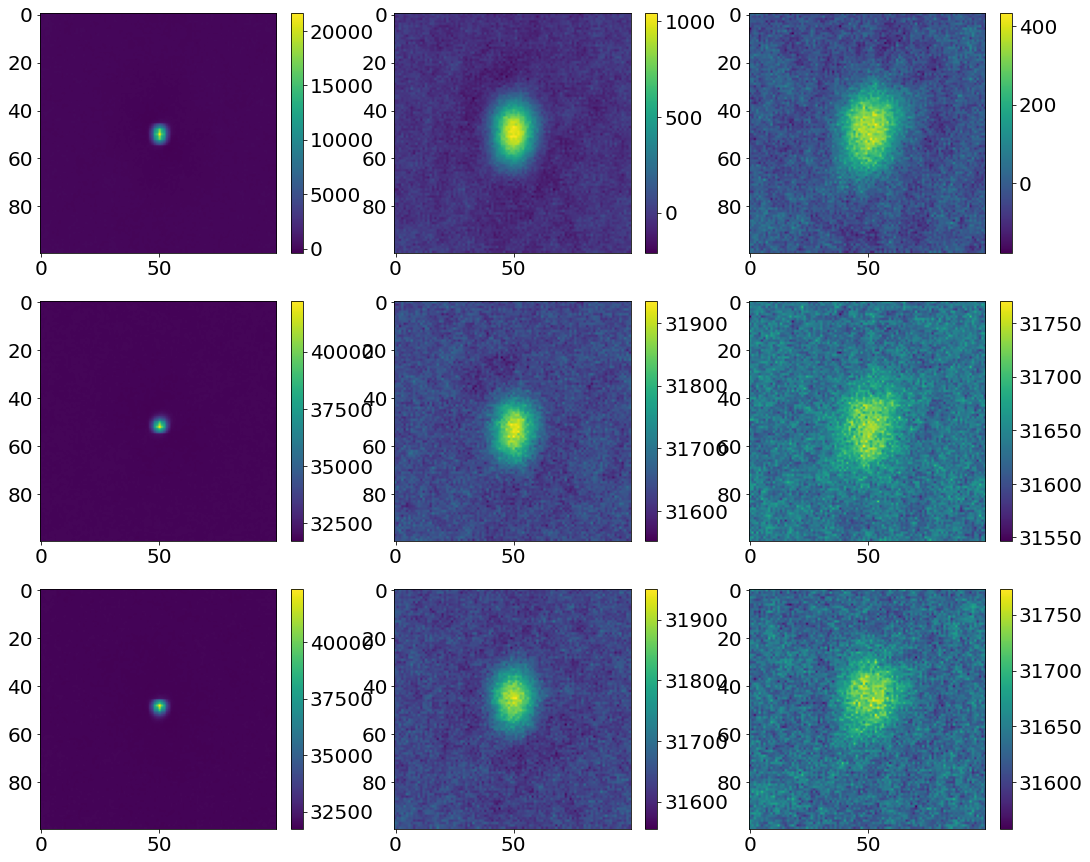

In [47]:
t1 = 4
t2 = 50
t3 = 100

plt.figure(figsize=(18,15))
plt.subplot(3,3,1)
scoor_r = np.roll(scoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.imshow(scoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,2)
scoor_r = np.roll(scoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.imshow(scoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,3)
scoor_r = np.roll(scoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.imshow(scoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,4)
pcoor_r = np.roll(pcoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.imshow(pcoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,5)
pcoor_r = np.roll(pcoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.imshow(pcoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,6)
pcoor_r = np.roll(pcoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.imshow(pcoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,7)
ncoor_r = np.roll(ncoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.imshow(ncoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,8)
ncoor_r = np.roll(ncoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.imshow(ncoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,9)
ncoor_r = np.roll(ncoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.imshow(ncoor_r,aspect='auto')
plt.colorbar()

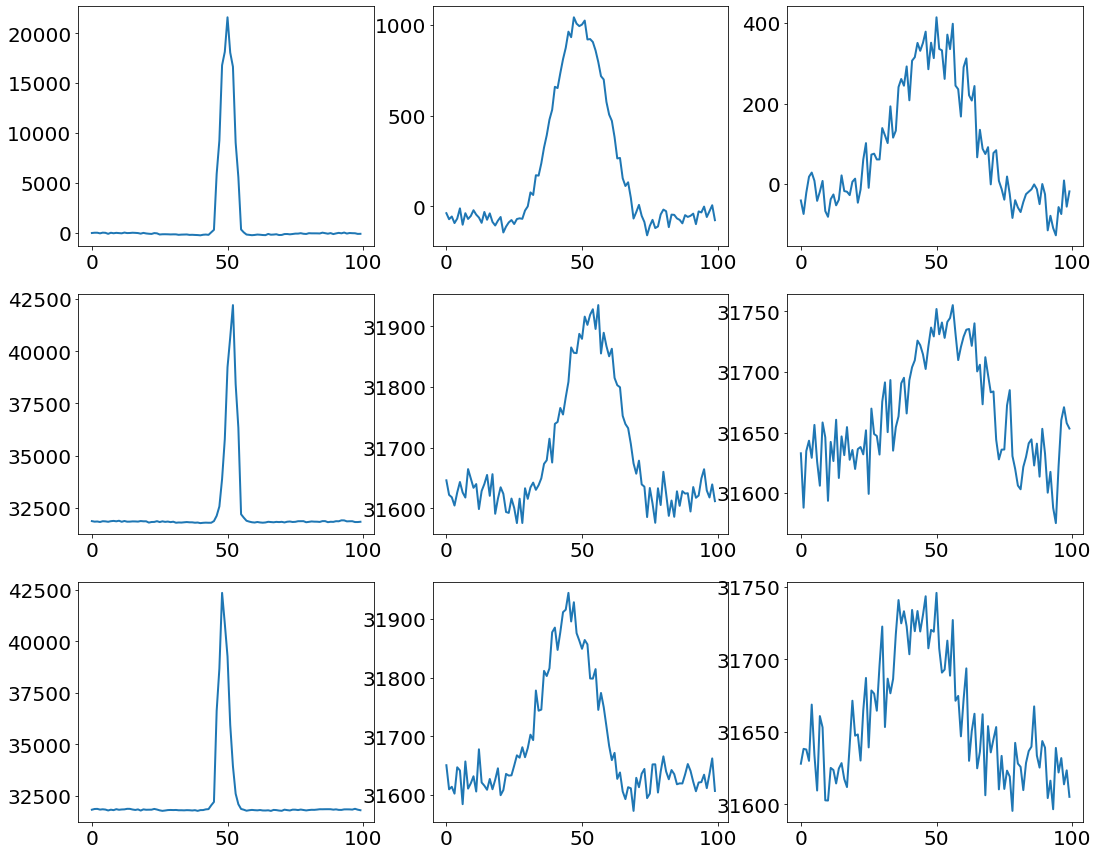

In [48]:
t1 = 4
t2 = 50
t3 = 100

plt.figure(figsize=(18,15))
plt.subplot(3,3,1)
scoor_r = np.roll(scoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.plot(scoor_r[:,50])
plt.subplot(3,3,2)
scoor_r = np.roll(scoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.plot(scoor_r[:,50])
plt.subplot(3,3,3)
scoor_r = np.roll(scoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.plot(scoor_r[:,50])
plt.subplot(3,3,4)
pcoor_r = np.roll(pcoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.plot(pcoor_r[:,50])
plt.subplot(3,3,5)
pcoor_r = np.roll(pcoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.plot(pcoor_r[:,50])
plt.subplot(3,3,6)
pcoor_r = np.roll(pcoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.plot(pcoor_r[:,50])
plt.subplot(3,3,7)
ncoor_r = np.roll(ncoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.plot(ncoor_r[:,50])
plt.subplot(3,3,8)
ncoor_r = np.roll(ncoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.plot(ncoor_r[:,50])
plt.subplot(3,3,9)
ncoor_r = np.roll(ncoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.plot(ncoor_r[:,50])

In [112]:
def double_gaussian_2d(coor, x0, y0, x1, y1, sigma_x0, sigma_y0, sigma_x1, sigma_y1, amplitude0, amplitude1, offset):
    """2D Gaussian function."""
    x = coor[0]
    y = coor[1]
    return offset + amplitude0 * np.exp(
        -(((x - x0) ** 2) / (2 * sigma_x0 ** 2) + ((y - y0) ** 2) / (2 * sigma_y0 ** 2))
    ) + amplitude1 * np.exp(
        -(((x - x1) ** 2) / (2 * sigma_x1 ** 2) + ((y - y1) ** 2) / (2 * sigma_y1 ** 2))
    )

params_l = []
t_fit_l = np.arange(10,90)
# for t in range(int(scoor.shape[-1]/2)):
for t in t_fit_l:
    print(t)
    scoor_t = np.roll(scoor[:,:,t],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
    # Get the coordinates of the pixels
    x = np.arange(0, scoor_t.shape[1])
    y = np.arange(0, scoor_t.shape[0])
    x, y = np.meshgrid(x, y)

    # Flatten the arrays for fitting
    x = x.ravel()
    y = y.ravel()
    z = scoor_t.ravel()

    # Initial guess for the parameters
    # initial_guess = (scoor_t.shape[1] / 2 - t/500*i*25, scoor_t.shape[0] / 2 ,
    #                 scoor_t.shape[1] / 2 + t/500*i*25, scoor_t.shape[0] / 2,  
    #                 1, 1, 
    #                 1, 1,
    #                 np.max(scoor_t), np.max(scoor_t), 
    #                 np.min(scoor_t)
    #                 )
    initial_guess = (
                scoor_t.shape[0] / 2, scoor_t.shape[1] / 2 - t/500*i*25,
                scoor_t.shape[0] / 2, scoor_t.shape[1] / 2 + t/500*i*25,
                1, 1, 
                1, 1,
                np.max(scoor_t), np.max(scoor_t), 
                np.min(scoor_t)
                )

    # Fit the data
    params, _ = curve_fit(double_gaussian_2d, (x, y), z, p0=initial_guess)

    # Extract the parameters
    params_l.append(params)

params_l = np.array(params_l)
params_l.shape

10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 2400.

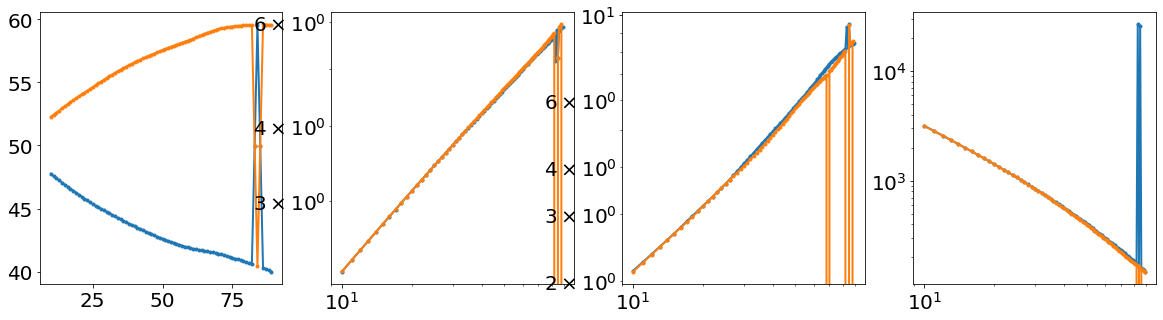

In [101]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.plot(t_fit_l,params_l[:,1],'.-')
plt.plot(t_fit_l,params_l[:,3],'.-')
plt.subplot(1,4,2)
# plt.plot(t_fit_l,(params_l[:,4]+params_l[:,5])/2,'.-')
# plt.plot(t_fit_l,(params_l[:,6]+params_l[:,7])/2,'.-')
plt.plot(t_fit_l,(params_l[:,4]),'.-')
plt.plot(t_fit_l,(params_l[:,6]),'.-')
plt.xscale('log')
plt.yscale('log')
plt.subplot(1,4,3)
plt.plot(t_fit_l,(params_l[:,5]),'.-')
plt.plot(t_fit_l,(params_l[:,7]),'.-')
plt.xscale('log')
plt.yscale('log')

plt.subplot(1,4,4)
plt.plot(t_fit_l,params_l[:,8],'.-')
plt.plot(t_fit_l,params_l[:,9],'.-')
plt.xscale('log')
plt.yscale('log')

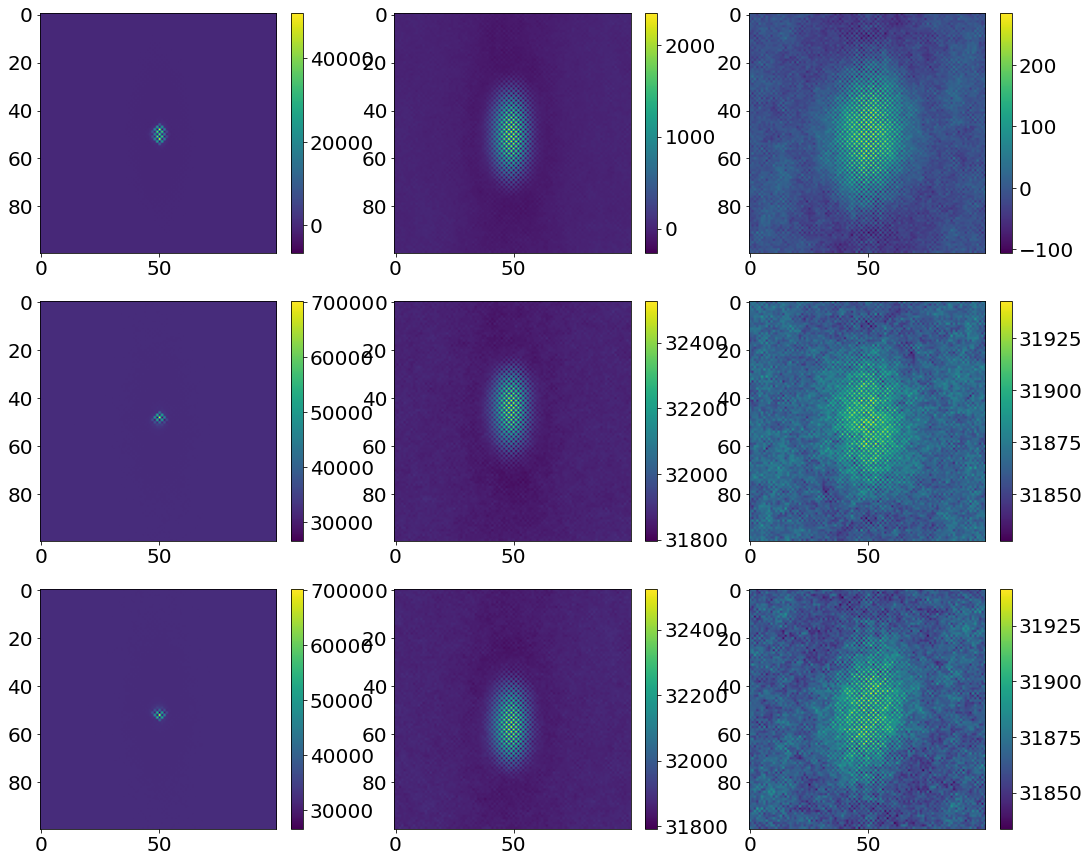

In [179]:
t1 = 4
t2 = 50
t3 = 200

plt.figure(figsize=(18,15))
plt.subplot(3,3,1)
scoor_r = np.roll(scoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(scoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,2)
scoor_r = np.roll(scoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(scoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,3)
scoor_r = np.roll(scoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(scoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,4)
pcoor_r = np.roll(pcoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(pcoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,5)
pcoor_r = np.roll(pcoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(pcoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,6)
pcoor_r = np.roll(pcoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(pcoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,7)
ncoor_r = np.roll(ncoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(ncoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,8)
ncoor_r = np.roll(ncoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(ncoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,9)
ncoor_r = np.roll(ncoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(ncoor_r,aspect='auto')
plt.colorbar()

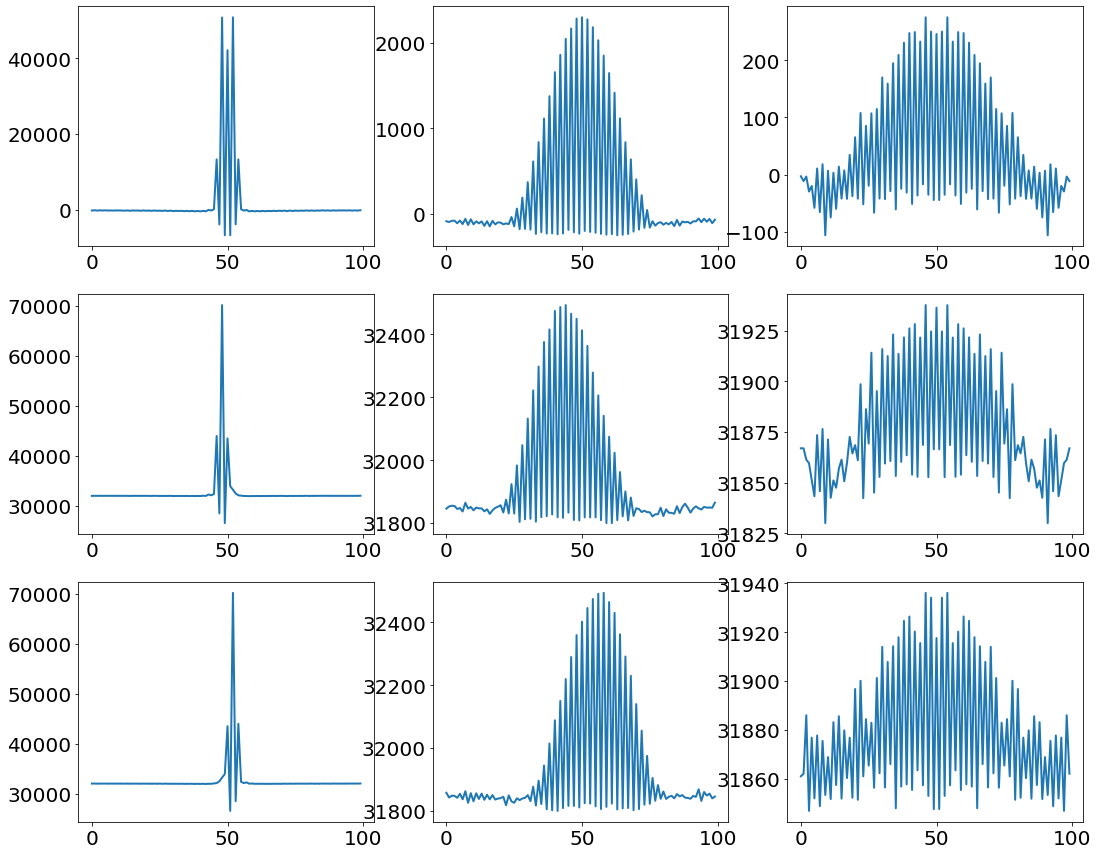

In [180]:
plt.figure(figsize=(18,15))
plt.subplot(3,3,1)
scoor_r = np.roll(scoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.plot(scoor_r[:,50])
plt.subplot(3,3,2)
scoor_r = np.roll(scoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.plot(scoor_r[:,50])
plt.subplot(3,3,3)
scoor_r = np.roll(scoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.plot(scoor_r[:,50])
plt.subplot(3,3,4)
pcoor_r = np.roll(pcoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.plot(pcoor_r[:,50])
plt.subplot(3,3,5)
pcoor_r = np.roll(pcoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.plot(pcoor_r[:,50])
plt.subplot(3,3,6)
pcoor_r = np.roll(pcoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.plot(pcoor_r[:,50])
plt.subplot(3,3,7)
ncoor_r = np.roll(ncoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.plot(ncoor_r[:,50])
plt.subplot(3,3,8)
ncoor_r = np.roll(ncoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.plot(ncoor_r[:,50])
plt.subplot(3,3,9)
ncoor_r = np.roll(ncoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.plot(ncoor_r[:,50])

In [108]:
def double_gaussian_2d(coor, x0, y0, x1, y1, sigma_x0, sigma_y0, sigma_x1, sigma_y1, amplitude0, amplitude1, offset):
    """2D Gaussian function."""
    x = coor[0]
    y = coor[1]
    return offset + amplitude0 * np.exp(
        -(((x - x0) ** 2) / (2 * sigma_x0 ** 2) + ((y - y0) ** 2) / (2 * sigma_y0 ** 2))
    ) + amplitude1 * np.exp(
        -(((x - x1) ** 2) / (2 * sigma_x1 ** 2) + ((y - y1) ** 2) / (2 * sigma_y1 ** 2))
    )

params_l = []
t_fit_l = np.arange(10,75)
# for t in range(int(scoor.shape[-1]/2)):
for t in t_fit_l:
    print(t)
    scoor_t = np.roll(scoor[:,:,t],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
    # Get the coordinates of the pixels
    x = np.arange(0, scoor_t.shape[1])
    y = np.arange(0, scoor_t.shape[0])
    x, y = np.meshgrid(x, y)

    # Flatten the arrays for fitting
    x = x.ravel()
    y = y.ravel()
    z = scoor_t.ravel()

    # Initial guess for the parameters
    # initial_guess = (scoor_t.shape[1] / 2 - t/500*i*25, scoor_t.shape[0] / 2 ,
    #                 scoor_t.shape[1] / 2 + t/500*i*25, scoor_t.shape[0] / 2,  
    #                 1, 1, 
    #                 1, 1,
    #                 np.max(scoor_t), np.max(scoor_t), 
    #                 np.min(scoor_t)
    #                 )
    initial_guess = (
                scoor_t.shape[0] / 2, scoor_t.shape[1] / 2 - t/500*i*25,
                scoor_t.shape[0] / 2, scoor_t.shape[1] / 2 + t/500*i*25,
                1, 1, 
                1, 1,
                np.max(scoor_t), np.max(scoor_t), 
                np.min(scoor_t)
                )

    # Fit the data
    params, _ = curve_fit(double_gaussian_2d, (x, y), z, p0=initial_guess)

    # Extract the parameters
    params_l.append(params)

params_l = np.array(params_l)
params_l.shape

10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74


(65, 11)

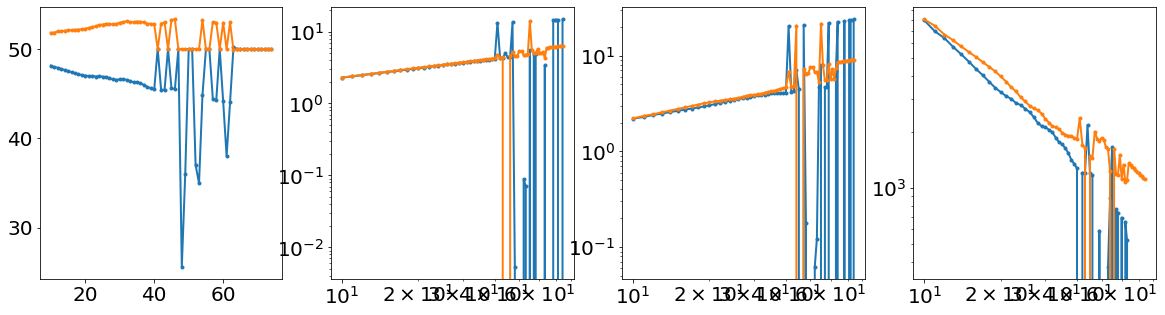

In [109]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.plot(t_fit_l,params_l[:,1],'.-')
plt.plot(t_fit_l,params_l[:,3],'.-')
plt.subplot(1,4,2)
# plt.plot(t_fit_l,(params_l[:,4]+params_l[:,5])/2,'.-')
# plt.plot(t_fit_l,(params_l[:,6]+params_l[:,7])/2,'.-')
plt.plot(t_fit_l,(params_l[:,4]),'.-')
plt.plot(t_fit_l,(params_l[:,6]),'.-')
plt.xscale('log')
plt.yscale('log')
plt.subplot(1,4,3)
plt.plot(t_fit_l,(params_l[:,5]),'.-')
plt.plot(t_fit_l,(params_l[:,7]),'.-')
plt.xscale('log')
plt.yscale('log')

plt.subplot(1,4,4)
plt.plot(t_fit_l,params_l[:,8],'.-')
plt.plot(t_fit_l,params_l[:,9],'.-')
plt.xscale('log')
plt.yscale('log')

### Drive
pdr=0.25+0.01*i, pgen=0.01, nsim=100, 31-40

pdr=0.25+0.01*i, pgen=0.1, nsim=100, 41-50

In [112]:
i = 1
file_name = "../data/240919/240919_%d_"%(50)
x_l = np.loadtxt(file_name+'pcoor_scanx.csv',skiprows=1)
y_l = np.loadtxt(file_name+'pcoor_scany.csv',skiprows=1)
t_l = np.loadtxt(file_name+'pcoor_scanz.csv',skiprows=1)
raw = np.loadtxt(file_name+'pcoor_data.csv',skiprows=1,delimiter=',')
pcoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')
raw = np.loadtxt(file_name+'ncoor_data.csv',skiprows=1,delimiter=',')
ncoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')
raw = np.loadtxt(file_name+'scoor_data.csv',skiprows=1,delimiter=',')
scoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')

mid_lattice = int(len(x_l)/2)

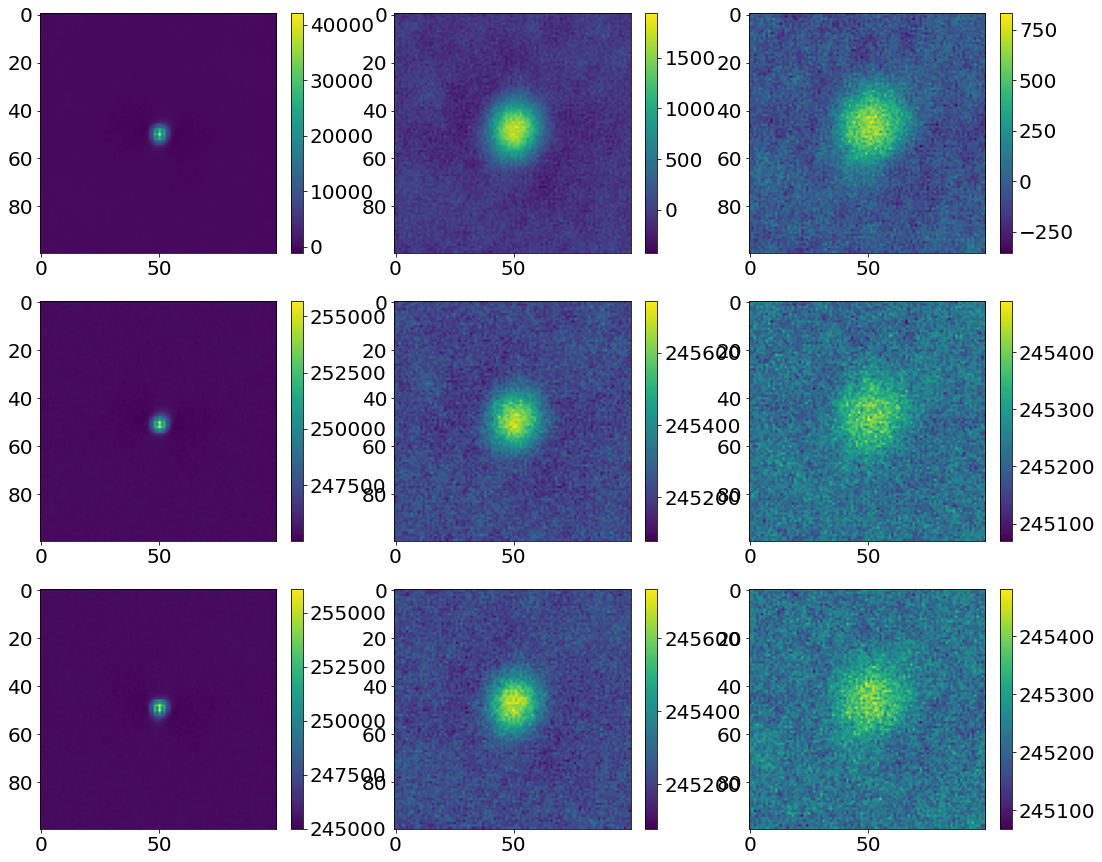

In [113]:
t1 = 4
t2 = 50
t3 = 100

plt.figure(figsize=(18,15))
plt.subplot(3,3,1)
scoor_r = np.roll(scoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.imshow(scoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,2)
scoor_r = np.roll(scoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.imshow(scoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,3)
scoor_r = np.roll(scoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.imshow(scoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,4)
pcoor_r = np.roll(pcoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.imshow(pcoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,5)
pcoor_r = np.roll(pcoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.imshow(pcoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,6)
pcoor_r = np.roll(pcoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.imshow(pcoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,7)
ncoor_r = np.roll(ncoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.imshow(ncoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,8)
ncoor_r = np.roll(ncoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.imshow(ncoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,9)
ncoor_r = np.roll(ncoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.imshow(ncoor_r,aspect='auto')
plt.colorbar()

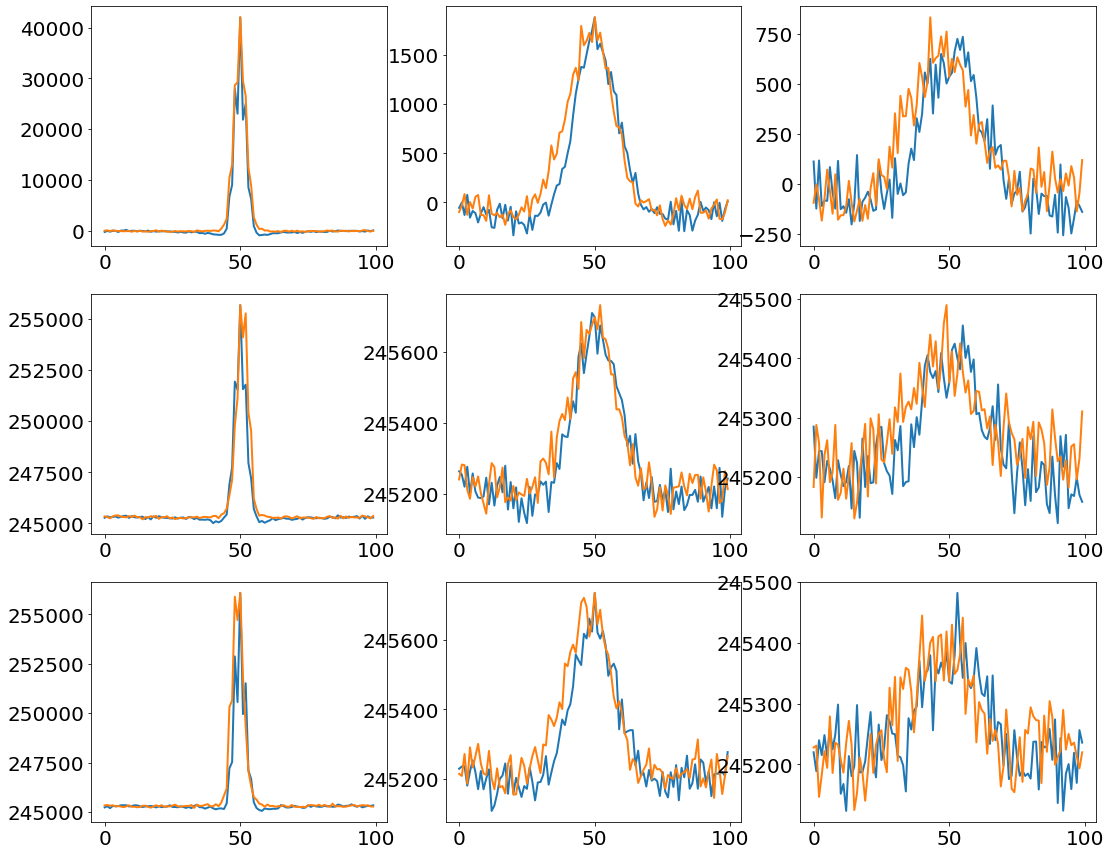

In [114]:
plt.figure(figsize=(18,15))
plt.subplot(3,3,1)
scoor_r = np.roll(scoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.plot(scoor_r[mid_lattice,:])
plt.plot(scoor_r[:,mid_lattice])
plt.subplot(3,3,2)
scoor_r = np.roll(scoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.plot(scoor_r[mid_lattice,:])
plt.plot(scoor_r[:,mid_lattice])
plt.subplot(3,3,3)
scoor_r = np.roll(scoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.plot(scoor_r[mid_lattice,:])
plt.plot(scoor_r[:,mid_lattice])
plt.subplot(3,3,4)
pcoor_r = np.roll(pcoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.plot(pcoor_r[mid_lattice,:])
plt.plot(pcoor_r[:,mid_lattice])
plt.subplot(3,3,5)
pcoor_r = np.roll(pcoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.plot(pcoor_r[mid_lattice,:])
plt.plot(pcoor_r[:,mid_lattice])
plt.subplot(3,3,6)
pcoor_r = np.roll(pcoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.plot(pcoor_r[mid_lattice,:])
plt.plot(pcoor_r[:,mid_lattice])
plt.subplot(3,3,7)
ncoor_r = np.roll(ncoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.plot(ncoor_r[mid_lattice,:])
plt.plot(ncoor_r[:,mid_lattice])
plt.subplot(3,3,8)
ncoor_r = np.roll(ncoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.plot(ncoor_r[mid_lattice,:])
plt.plot(ncoor_r[:,mid_lattice])
plt.subplot(3,3,9)
ncoor_r = np.roll(ncoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.plot(ncoor_r[mid_lattice,:])
plt.plot(ncoor_r[:,mid_lattice])

#### Gaussian fit

In [104]:
def gaussian_2d(coor, x0, y0, sigma_x, sigma_y, amplitude, offset):
    """2D Gaussian function."""
    x = coor[0]
    y = coor[1]
    return offset + amplitude * np.exp(
        -(((x - x0) ** 2) / (2 * sigma_x ** 2) + ((y - y0) ** 2) / (2 * sigma_y ** 2))
    )

params_l = []
# for t in range(int(scoor.shape[-1]/2)):
for t in range(200):
    scoor_t = np.roll(scoor[:,:,t],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
    # Get the coordinates of the pixels
    x = np.arange(0, scoor_t.shape[1])
    y = np.arange(0, scoor_t.shape[0])
    x, y = np.meshgrid(x, y)

    # Flatten the arrays for fitting
    x = x.ravel()
    y = y.ravel()
    z = scoor_t.ravel()

    # Initial guess for the parameters
    initial_guess = (scoor_t.shape[1] / 2, scoor_t.shape[0] / 2, 1, 1, np.max(scoor_t), np.min(scoor_t))
    
    # Fit the data
    params, _ = curve_fit(gaussian_2d, (x, y), z, p0=initial_guess)

    # Extract the parameters
    x0, y0, sigma_x, sigma_y, amplitude, offset = params
    params_l.append(params)

params_l = np.array(params_l)
params_l.shape

/usr/local/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


(200, 6)

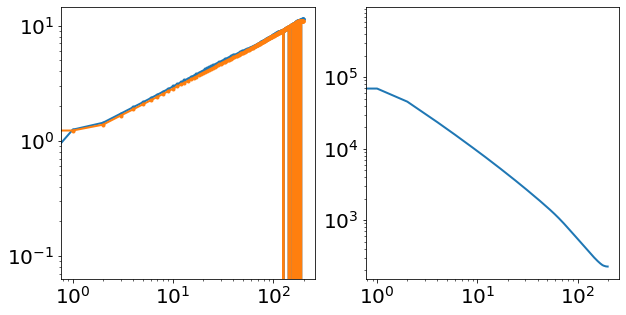

In [105]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot((params_l[:,2]),'.-')
plt.plot(params_l[:,3],'.-')
# plt.ylim(1e0,1e1)
plt.xscale('log')
plt.yscale('log')
plt.subplot(1,2,2)
plt.plot(params_l[:,4])
plt.xscale('log')
plt.yscale('log')

In [106]:
slope_start = 10
slope_end = 50

tfit_l = np.arange(slope_start,slope_end,dtype=int)
m, b = np.polyfit(np.log(tfit_l), np.log((params_l[slope_start:slope_end,2]+params_l[slope_start:slope_end,3])/2), 1)
print("var exponents", m)
m, b = np.polyfit(np.log(tfit_l), np.log(params_l[slope_start:slope_end,4]), 1)
print("var exponents", m)

var exponents 0.44366088011195653
var exponents -1.133217989045513


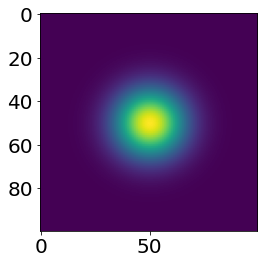

In [107]:
fitted_gaussian = gaussian_2d((x, y), *params).reshape(scoor_t.shape)
plt.imshow(fitted_gaussian)


#### Moment along the parallel cut

In [115]:


tm_l = np.arange(10,200)
m1_l = np.zeros(tm_l.shape)
m2_l = np.zeros(tm_l.shape)
m3_l = np.zeros(tm_l.shape)
m4_l = np.zeros(tm_l.shape)
m5_l = np.zeros(tm_l.shape)
m6_l = np.zeros(tm_l.shape)
m7_l = np.zeros(tm_l.shape)
m8_l = np.zeros(tm_l.shape)

for idx, tm in enumerate(tm_l):
    scoor_r = np.roll(scoor[:,:,tm],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
    m1_l[idx] = findMoment(scoor_r[:,mid_lattice],1)
    m2_l[idx] = findMoment(scoor_r[:,mid_lattice],2,shift=m1_l[idx])
    m3_l[idx] = findMoment(scoor_r[:,mid_lattice],3,shift=m1_l[idx])
    m4_l[idx] = findMoment(scoor_r[:,mid_lattice],4,shift=m1_l[idx])
    m5_l[idx] = findMoment(scoor_r[:,mid_lattice],5,shift=m1_l[idx])
    m6_l[idx] = findMoment(scoor_r[:,mid_lattice],6,shift=m1_l[idx])
    m7_l[idx] = findMoment(scoor_r[:,mid_lattice],7,shift=m1_l[idx])
    m8_l[idx] = findMoment(scoor_r[:,mid_lattice],8,shift=m1_l[idx])

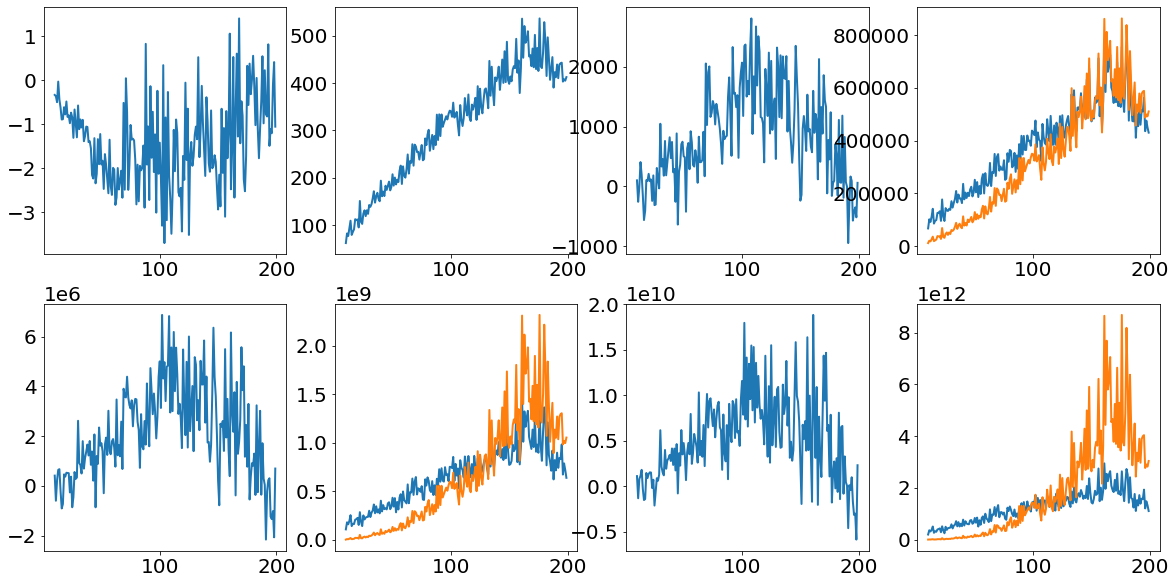

In [116]:
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.plot(tm_l,m1_l)
plt.subplot(2,4,2)
plt.plot(tm_l,m2_l)
plt.subplot(2,4,3)
plt.plot(tm_l,m3_l)
plt.subplot(2,4,4)
plt.plot(tm_l,m4_l)
plt.plot(tm_l,3*m2_l**2)
plt.subplot(2,4,5)
plt.plot(tm_l,m5_l)
plt.subplot(2,4,6)
plt.plot(tm_l,m6_l)
plt.plot(tm_l,15*m2_l**3)
plt.subplot(2,4,7)
plt.plot(tm_l,m7_l)
plt.subplot(2,4,8)
plt.plot(tm_l,m8_l)
plt.plot(tm_l,105*m2_l**4)

#### moment along the perpendicular cut

In [117]:
tm_l = np.arange(10,200)
m1_l = np.zeros(tm_l.shape)
m2_l = np.zeros(tm_l.shape)
m3_l = np.zeros(tm_l.shape)
m4_l = np.zeros(tm_l.shape)
m5_l = np.zeros(tm_l.shape)
m6_l = np.zeros(tm_l.shape)
m7_l = np.zeros(tm_l.shape)
m8_l = np.zeros(tm_l.shape)

for idx, tm in enumerate(tm_l):
    scoor_r = np.roll(scoor[:,:,tm],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
    m1_l[idx] = findMoment(scoor_r[mid_lattice,:],1)
    m2_l[idx] = findMoment(scoor_r[mid_lattice,:],2,shift=m1_l[idx])
    m3_l[idx] = findMoment(scoor_r[mid_lattice,:],3,shift=m1_l[idx])
    m4_l[idx] = findMoment(scoor_r[mid_lattice,:],4,shift=m1_l[idx])
    m5_l[idx] = findMoment(scoor_r[mid_lattice,:],5,shift=m1_l[idx])
    m6_l[idx] = findMoment(scoor_r[mid_lattice,:],6,shift=m1_l[idx])
    m7_l[idx] = findMoment(scoor_r[mid_lattice,:],7,shift=m1_l[idx])
    m8_l[idx] = findMoment(scoor_r[mid_lattice,:],8,shift=m1_l[idx])

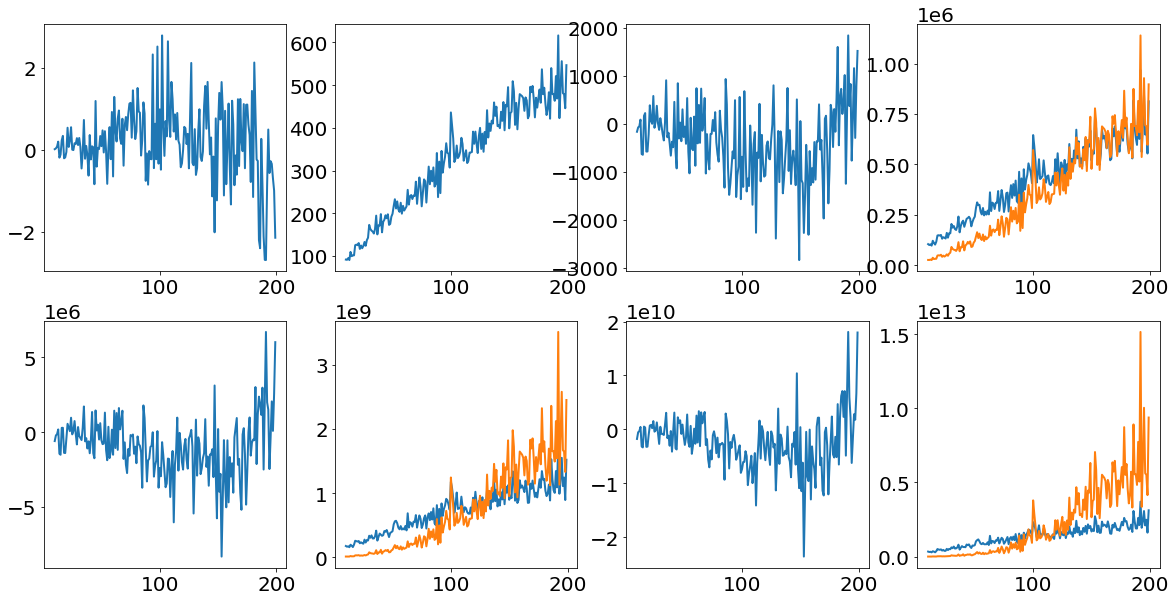

In [118]:
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.plot(tm_l,m1_l)
plt.subplot(2,4,2)
plt.plot(tm_l,m2_l)
plt.subplot(2,4,3)
plt.plot(tm_l,m3_l)
plt.subplot(2,4,4)
plt.plot(tm_l,m4_l)
plt.plot(tm_l,3*m2_l**2)
plt.subplot(2,4,5)
plt.plot(tm_l,m5_l)
plt.subplot(2,4,6)
plt.plot(tm_l,m6_l)
plt.plot(tm_l,15*m2_l**3)
plt.subplot(2,4,7)
plt.plot(tm_l,m7_l)
plt.subplot(2,4,8)
plt.plot(tm_l,m8_l)
plt.plot(tm_l,105*m2_l**4)